**NB : This project heavily depends on folium function to visualize map. Unfortunately, you may face problem to see the maps as 
output on Github page. For this reason i have provided links of JPG file below every map-output. If you face problem to see the map you can simply click on the link to see the maps**.

## Project: To Set up an Office(HUB) in Toronto to Deliver Food from Restaurants to Home 

**Lieferando** (Former name Takeaway) (https://www.lieferando.de/en/) is a Dutch dot-com company specialized in online food ordering and home delivery. 
It is an intermediary online portal between the customer and the restaurants, 
where customers can order food online from restaurants’ menus, and 
have it delivered by the restaurants directly to their home. <br> Currently, **they are planning to set up an office in Toronto to deliver foods from restaurants to home**. Riders usually stay at the office (HUB) and go to the restaurants when they get orders.
Its important that the office must be built close to most of the restaurants so that, riders can move fast to the restaurants 
and deliver the food as quick as possible.<br> The pre-requisite of this project is: a) right now they will set only 
one office (HUB) in Toronto b) The HUB should be as close to as most of the neighourhoods in Toronto c) It has to set close
to city center.

In [206]:
import numpy as np
import pandas as pd
from IPython.display import Image



In [160]:
!pip install html5lib
import html5lib

## Step 1: Data importing and pre processing

### Importing Data from Wikipedia

In [161]:
uss=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [162]:
print(type(uss))

<class 'list'>


In [166]:
uss[0].head(34)
my_dataframe=uss[0]
my_dataframe.rename(columns={"District": "Borough"},inplace=True)
my_dataframe.head(10)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
8,M8A,Not assigned,Not assigned
9,M9A,Downtown Toronto,Queen's Park


In [167]:
my_dataframe.dtypes

Postcode         object
Borough          object
Neighbourhood    object
dtype: object

In [168]:
h=my_dataframe.astype(str)
h.dtypes

Postcode         object
Borough          object
Neighbourhood    object
dtype: object

### Ignore cells with  "Borough" that is Not assigned.

In [169]:
my_dataframe = my_dataframe[my_dataframe.Borough != 'Not assigned']
my_dataframe.head(10)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
9,M9A,Downtown Toronto,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


### Group by "PostCode"

In [170]:
pd.set_option('display.max_rows', None)
my_dataframe.groupby(['Postcode'])
my_dataframe.head(10)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
9,M9A,Downtown Toronto,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


### Same "Neighborhoods" separated with a comma 

In [171]:
#Y=my_dataframe.groupby(['Postcode','Borough',],as_index=True).Neighbourhood.agg([ ('Neighbourhood10', ', '.join)])

Y=my_dataframe.groupby(['Postcode','Borough',],as_index=True).Neighbourhood.agg([ ('Neighbourhood', ', '.join)])
Y.head(10)


,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,"Rouge, Malvern"
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
M1J,Scarborough,Scarborough Village
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"


Including Index number

In [172]:
Y.reset_index(inplace=True)
Y.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Setting neighborhood the same as the "borough" for  *Not assigned* neighborhood

In [173]:
Y.loc[(Y.Neighbourhood == 'Not assigned'),'Neighbourhood']='Queen\'s Park'
Y.head(10)


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


 Final Shape of DataFrame

In [174]:
Y.shape

(103, 3)

### Importing Geospatial Data

In [175]:
geo=pd.read_csv("D:\IBM Data Science Professional Certificate\Capstone Project\week3\\Geospatial_Coordinates.csv")

In [176]:
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Concatenating values from Geospatial Data with Given Data Frame

In [177]:
DataFrame= pd.concat([Y, geo],axis=1)
DataFrame.head(10)

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",M1K,43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",M1L,43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",M1M,43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",M1N,43.692657,-79.264848


#### So, Our Final DataFrame is :

In [178]:
DataFrame.drop(columns=['Postal Code'],inplace=True)
DataFrame.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


--------------------------------------------------------------------------------------------------------------------------

## Step 2: Using the Final DataFrame with FourthSquare API to extract maps

#### First download all the dependencies that we will need

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\saifu\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.20.0-py_0




geopy-1.20.0         | 57 KB     |            |   0% 
geopy-1.20.0         | 57 KB     | ##7        |  28% 
geopy-1.20.0         | 57 KB     | ########## | 100% 

geographiclib-1.50   | 34 KB     |            |   0% 
geographiclib-1.50   | 34 K

#### Use "geopy" library to get the latitude and longitude values of **Toronto**

In [179]:
address = 'Toronto City Center, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City Center are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City Center are 43.653963, -79.387207.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [180]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(DataFrame['Latitude'], DataFrame['Longitude'], DataFrame['Borough'], DataFrame['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

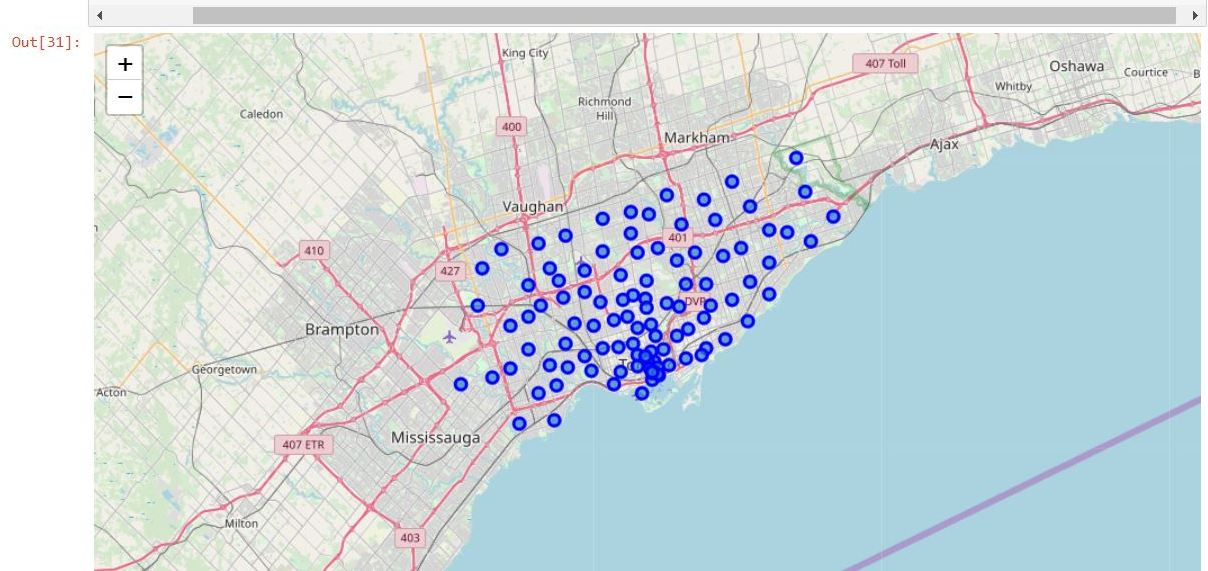

In [207]:
Image(filename='map_cluster.JPG')

*Please Note: Sometimes the  Map Output doesn't show on Github portal, thats why for convenience here I have attached the screenshot of the code output*
   

In [181]:
DataFrame['Borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

In [182]:
DataFrame['Borough'].describe()

count            103
unique            11
top       North York
freq              24
Name: Borough, dtype: object

### List of Top Boroughs <br> 
(listed according to the number of neighborhoods)

In [183]:
DataFrame['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           11
Central Toronto      9
West Toronto         6
East York            5
York                 5
East Toronto         5
Queen's Park         1
Mississauga          1
Name: Borough, dtype: int64

-------------------------------------------------------------------------------------------------------------

**Observation**  :  Lieferando plans to build Office to the highest neighourhood places of  Boroughs in Toronto. <br> 
So the first one will be considered to  buid HUB  in   Toronto , i.e. North York <br> 
 
Now lets see in North York which location is the most suitable for setting up office(HUB). <br> <br>
For this we need to explore the neigherwood of "North York ". <br>
Usually places with most number of restaurants are suitable to build the HUB, since its easy to deliver food  if the HUB is close to restaurants<br>

### Now, Lets Explore the Borough: North York

In [184]:
North_York_data = DataFrame[DataFrame['Borough'] == 'North York'].reset_index(drop=True)
North_York_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"Silver Hills, York Mills",43.757490,-79.374714
4,M2M,North York,"Newtonbrook, Willowdale",43.789053,-79.408493


#### Let's get the geographical coordinates of North York.

In [185]:
address = 'North York, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))


North_York_Latitude=latitude
North_York_Longitude=longitude


The geograpical coordinate of North York are 43.7543263, -79.4491169663959.


#### Let's visualize the neighborhoods of North York  

In [186]:
# create map of Manhattan using latitude and longitude values
map_North_York = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(North_York_data['Latitude'], North_York_data['Longitude'], North_York_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_North_York)  
    
map_North_York

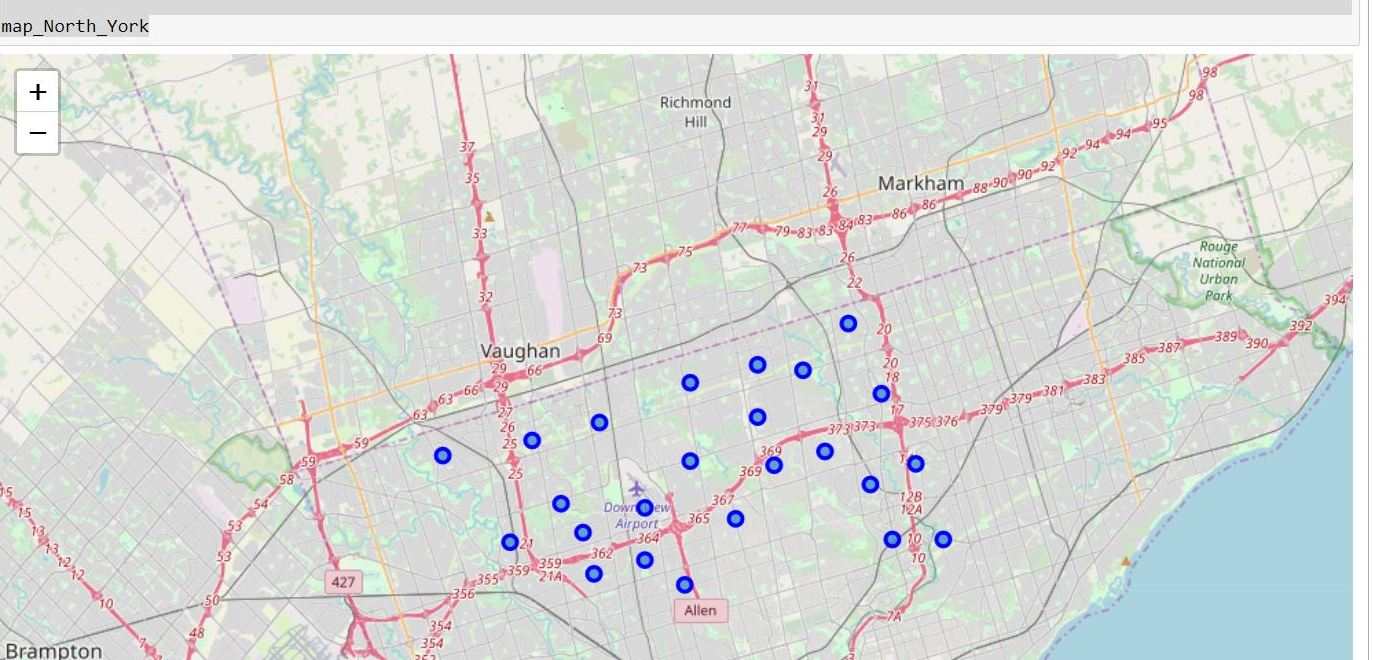

In [208]:
Image(filename='map2_North_Work.JPG')

*Please Note: Sometimes the  Map Output doesn't show on Github portal, thats why for convenience here I have attached the screenshot of the code output*

## Utilizing Foursquare API

Define Foursquare Credentials and Version

In [188]:
CLIENT_ID = 'ASICXZARZVNLM0ZMYDSL11VH52V1OVTDLXMQKZRUWXYUHPER' # your Foursquare ID
CLIENT_SECRET = 'M2YLHD5LJX5NP3PZ4RUOI0NISQ2QXNRV3B3HHHTIBBYTQPQO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ASICXZARZVNLM0ZMYDSL11VH52V1OVTDLXMQKZRUWXYUHPER
CLIENT_SECRET:M2YLHD5LJX5NP3PZ4RUOI0NISQ2QXNRV3B3HHHTIBBYTQPQO


### Let's get the top 100 venues that are in North York within a radius of 3500 meters

First, let's create the GET request URL. Name your URL url.

In [189]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 7500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    North_York_Latitude, 
    North_York_Longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ASICXZARZVNLM0ZMYDSL11VH52V1OVTDLXMQKZRUWXYUHPER&client_secret=M2YLHD5LJX5NP3PZ4RUOI0NISQ2QXNRV3B3HHHTIBBYTQPQO&v=20180605&ll=43.7543263,-79.4491169663959&radius=7500&limit=100'

Send the GET request and examine the resutls

In [190]:
results = requests.get(url).json()
#results     #remove '#' to check the elements of varibale 'results'

let's borrow the **get_category_type** function from the Foursquare lab.

In [191]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe

In [192]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Earl Bales Park,Park,43.753043,-79.436228
1,Archers Arena,Recreation Center,43.754101,-79.467200
2,Wolfie's Deli,Deli / Bodega,43.754875,-79.442438
3,Starbucks,Coffee Shop,43.758597,-79.466252
4,Nordstrom,Clothing Store,43.726076,-79.449335
5,True North Climbing,Climbing Gym,43.745507,-79.474332
6,Kinka Izakaya,Japanese Restaurant,43.760161,-79.409827
7,LCBO,Liquor Store,43.732717,-79.454717
8,Bagel Plus,Restaurant,43.755395,-79.440686
9,Crate & Barrel,Furniture / Home Store,43.726584,-79.452661


### Now we have to  filter the venues by "Restaurant". Since our target is only restaurants to analyze data 

In [193]:
North_York_Restaurants=nearby_venues[nearby_venues ['categories'].str.contains('estaurant')]
North_York_Restaurants.head()

,name,categories,lat,lng
6,Kinka Izakaya,Japanese Restaurant,43.760161,-79.409827
8,Bagel Plus,Restaurant,43.755395,-79.440686
13,RH Courtyard Café,Restaurant,43.724874,-79.455536
15,Auberge du Pommier,French Restaurant,43.746962,-79.407879
23,Konjiki Ramen,Ramen Restaurant,43.766998,-79.412222


--------------------------------------------------------------------------------------------

#### Let's Visualize    **Top 100 Restaurants** that are in North York within a radius of 7500 meters

In [194]:
address = 'North York, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))


North_York_Latitude=latitude
North_York_Longitude=longitude

The geograpical coordinate of North York are 43.7543263, -79.4491169663959.


In [195]:
# create map of Manhattan using latitude and longitude values
map_North_York_Restaurants = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(North_York_Restaurants['lat'], North_York_Restaurants['lng'], North_York_Restaurants['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_North_York_Restaurants)  
    
map_North_York_Restaurants

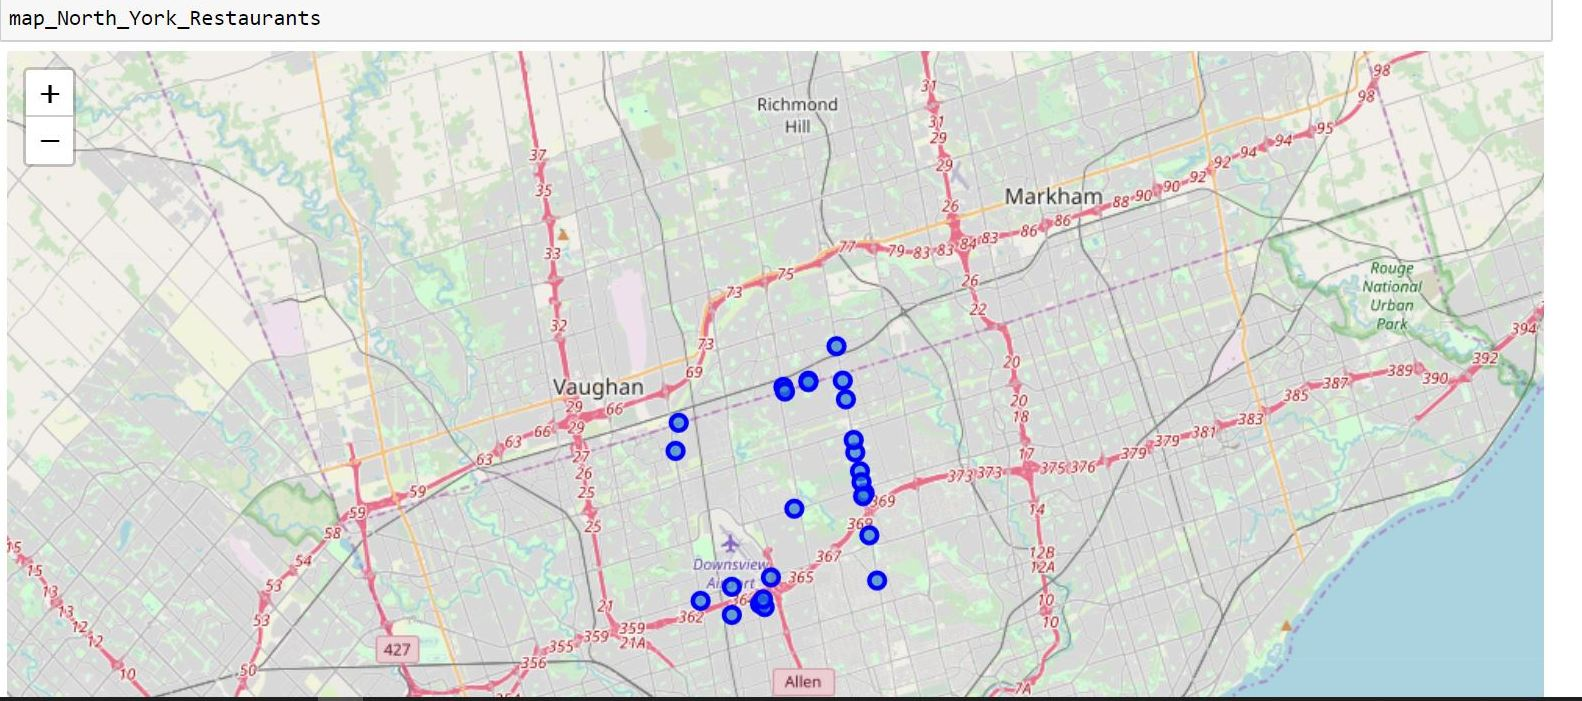

In [210]:
Image(filename='map3_North_York_Restaurants.JPG')

*Please Note: Sometimes the  Map Output doesn't show on Github portal, thats why for convenience here I have attached the screenshot of the code output*


If we zoom in the above map, we can see the below image 

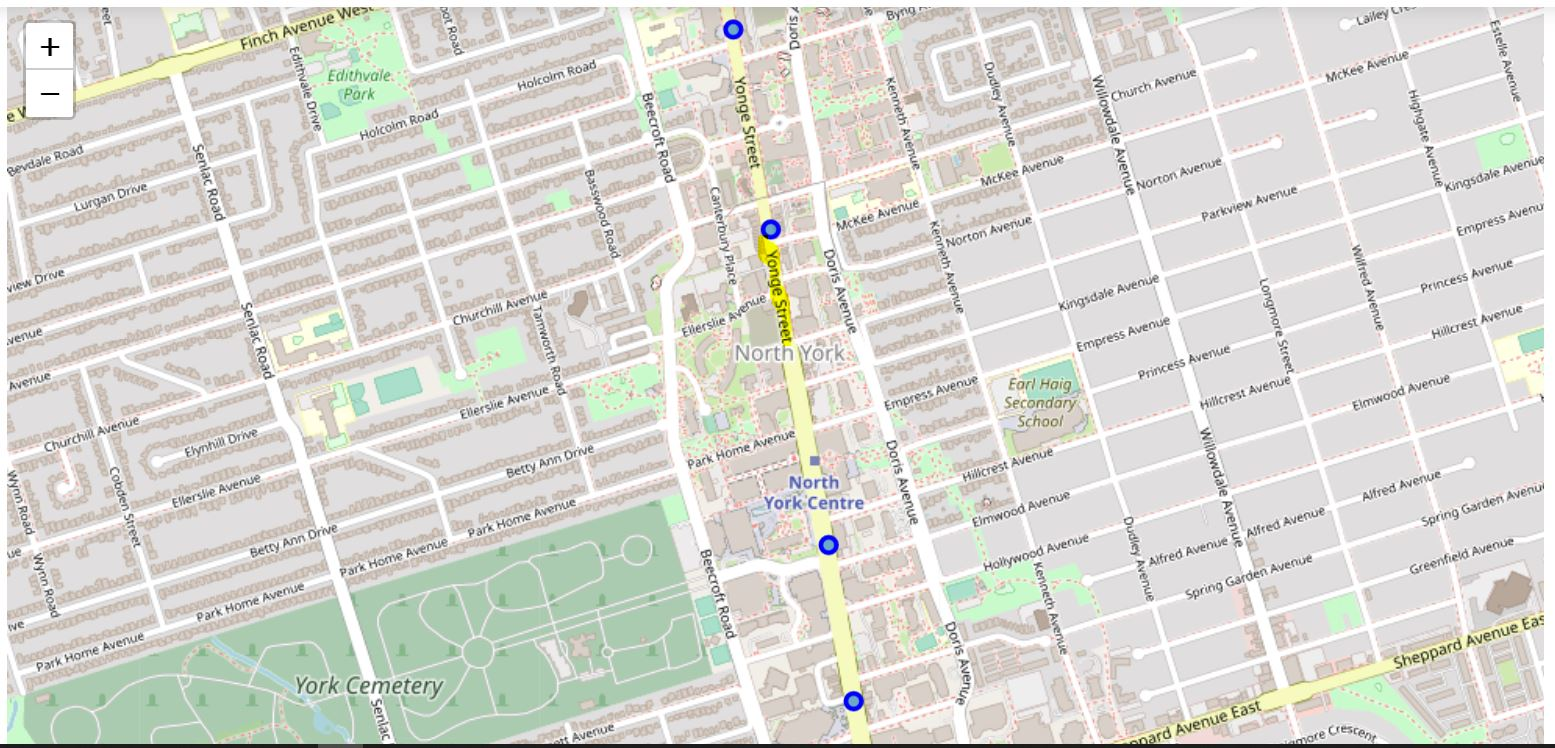

In [212]:
Image(filename='map4.JPG')

**Result Analysis** <br>Now, if we analyze above restaurant locations we see  that most of the restaurants lie either Yonge Street or Dufferin Street. Food delivery companies usually try to set up their HUB close to most of the restaurants. <br>  Considering this fact it would be best for Lieferando to set up their HUB at Yonge Street , North York, Toronto.